In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride = pd.merge(city, ride, on = 'city', how = 'outer')

# Display the data table for preview
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Gets the count per city grouped by type and each city. This will be used to determine marker size for bubble plot.

driver_count = city_ride[['type','city','driver_count']]

driver_count = driver_count.drop_duplicates('city')

driver_count = driver_count.sort_index()

driver_count.head()






,type,city,driver_count
0,Urban,Richardfort,38
28,Urban,Williamsstad,59
51,Urban,Port Angela,67
70,Urban,Rodneyfort,34
93,Urban,West Robert,39


## Bubble Plot of Ride Sharing Data

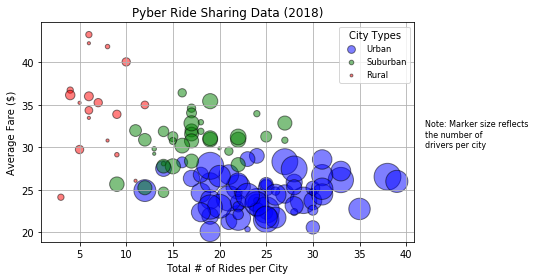

In [78]:
# Gets your types of cities in a sorted list
city_types = list(sorted(set(city_ride['type']),reverse = True))


# Obtains dataframes for each city type, and drivers for each city type and stores each data frame as a list
city_type_df = [city_ride.loc[city_ride['type'] == citytype,:] for citytype in city_types]
driver_count_df = [driver_count.loc[driver_count['type'] == citytype,:] for citytype in city_types]


# Obtains your x and y coordinates for each city type and stores the data frames as a list   
num_rides = [citytype.groupby('city')['ride_id'].count() for citytype in city_type_df]
avg_rides = [citytype.groupby('city')['fare'].mean() for citytype in city_type_df]

# Obtains 
drivers_per_city = [citytype['driver_count'] for citytype in driver_count_df]


colors = ['b','g','r']

for a,b,c,d in zip(num_rides,avg_rides, drivers_per_city,colors):
        plt.scatter(a, b, s= 10*c, c = d, edgecolors = 'black',alpha = 0.5)
    

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2018)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total # of Rides per City')


# Create a legend
plt.legend(labels = city_types, title = 'City Types', fontsize = 'small',markerscale = .4)
plt.annotate('Note: Marker size reflects\nthe number of\ndrivers per city',size=8,xy=(10,20),xytext=(42, 30))
# Save Figure
plt.grid()
plt.tight_layout()
plt.savefig('Pyber_Scatterplot.png')
plt.show()



## Total Fares by City Type

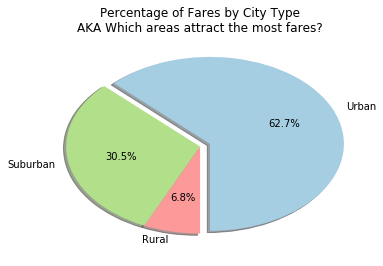

In [24]:
# Calculate Type Percents
total_fare = city_ride['fare'].sum()

fare_percents = [round(city_type['fare'].sum()/total_fare*100,2) for city_type in city_type_df]

# Build Pie Chart
explode = (0.08, 0.0, 0.0)
colors = plt.cm.Paired(np.linspace(.01,4,25))

plt.pie(sorted(fare_percents, reverse = True), labels = sorted(city_types, reverse = True), colors = colors, explode = explode, shadow = True, startangle = 270, autopct = '%1.1f%%')
plt.title('Percentage of Fares by City Type\nAKA Which areas attract the most fares?')

# Save Figure
plt.savefig('PyberPie_Fares_by_City.png')

# Show Figure
plt.show()

## Total Rides by City Type

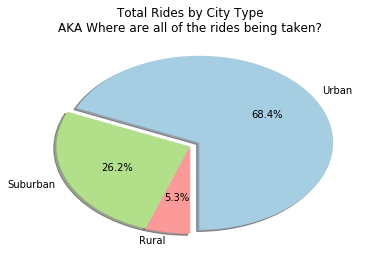

In [25]:
# Calculate Ride Percents
total_count = city_ride['ride_id'].count()

ride_percents = [round(city_type['ride_id'].count()/total_fare*100,2) for city_type in city_type_df]

# Build Pie Chart

explode = (0.08, 0.0, 0)
colors = plt.cm.Paired(np.linspace(.01,4,25))

plt.pie(sorted(ride_percents, reverse = True), labels = sorted(city_types, reverse = True), colors = colors, explode = explode, shadow = True, startangle = 270, autopct = '%1.1f%%')
plt.title('Total Rides by City Type\nAKA Where are all of the rides being taken?')

# Save Figure
plt.savefig('PyberPie_Rides_by_CityType.png')

# Show Figure
plt.show()

## Total Drivers by City Type

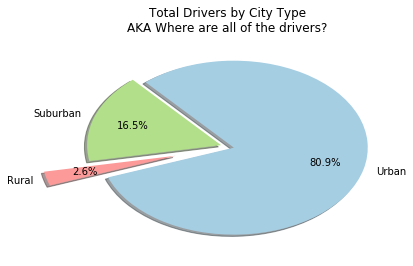

In [37]:
# Calculate Driver Percents
total_drivers = driver_count['driver_count'].sum()

driver_percents = [round(citytype['driver_count'].sum()/total_drivers*100,2) for citytype in driver_count_df]

# Build Pie Charts
explode = (0.05, 0.05, 0.4)
colors = plt.cm.Paired(np.linspace(.01,4,25))
plt.pie(sorted(driver_percents, reverse = True), labels = sorted(city_types, reverse = True), colors = colors, explode = explode, shadow = True, startangle = 200, autopct = '%1.1f%%', pctdistance=.70)
plt.title('Total Drivers by City Type\nAKA Where are all of the drivers?')

# Save Figure
plt.savefig('PyberPie_Drivers_by_CityType.png')

# Show Figure
plt.show()
